In [1]:
import numpy as np
import pylab as pl
import scipy.stats
import scipy.spatial

/var/folders/k_/7qh4l0nn72b7qgq15pkd4hw40000gt/T/ipykernel_71765/2016458089.py:16: DeprecationWarning: Please use `KDTree` from the `scipy.spatial` namespace, the `scipy.spatial.kdtree` namespace is deprecated.
  kt = scipy.spatial.kdtree.KDTree(np.transpose([x,y]))
/var/folders/k_/7qh4l0nn72b7qgq15pkd4hw40000gt/T/ipykernel_71765/2016458089.py:17: DeprecationWarning: Please use `KDTree` from the `scipy.spatial` namespace, the `scipy.spatial.kdtree` namespace is deprecated.
  kt2 = scipy.spatial.kdtree.KDTree(np.transpose([x,y])[r2<1,:])


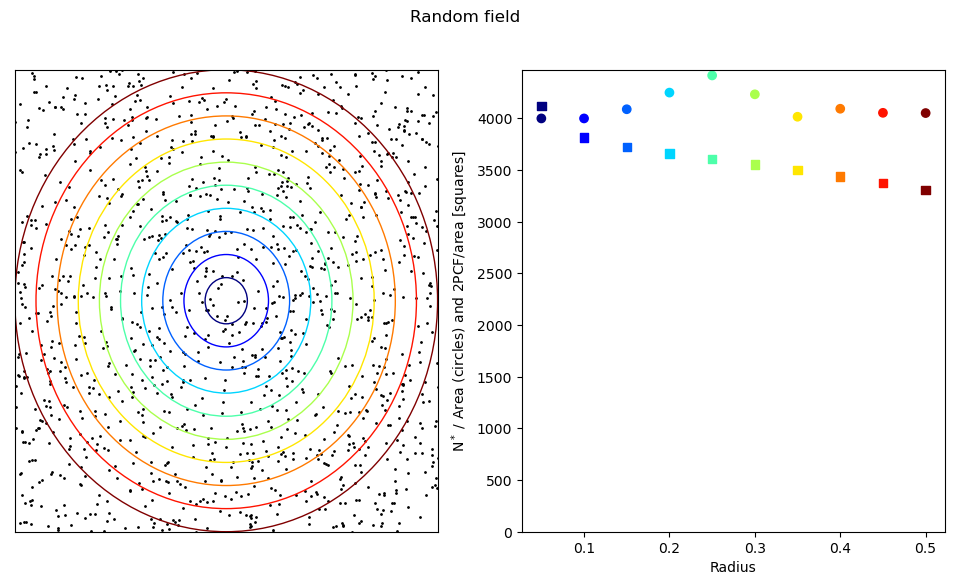

In [2]:
x, y = (np.random.rand(5000)-0.5)*2 + 0.5, (np.random.rand(5000)-0.5)*2+0.5
r2 = (x-0.5)**2 + (y-0.5)**2

fig = pl.figure(figsize=(12,6))
ax = pl.subplot(1,2,1)
ax.scatter(x,y, color='k', s=1)
radii = np.linspace(0.05, 0.5, 10)
for r, col in zip(radii, pl.cm.jet(np.linspace(0,1,10))):
    ax.add_patch(pl.Circle([0.5, 0.5], radius=r, facecolor='none', edgecolor=col))
pl.axis([0,1,0,1])
    
ax2 = pl.subplot(1,2,2)
nstars = (r2[:,None]<radii[None,:]**2).sum(axis=0) / radii**2
ax2.scatter(radii, nstars, c=pl.cm.jet(np.linspace(0,1,10)))

kt = scipy.spatial.kdtree.KDTree(np.transpose([x,y]))
kt2 = scipy.spatial.kdtree.KDTree(np.transpose([x,y])[r2<1,:])
twopcf = kt.count_neighbors(kt2, radii)
t2 = twopcf/radii**2
ax2.scatter(radii, t2/t2.max()*nstars.mean(), c=pl.cm.jet(np.linspace(0,1,10)), marker='s')


ax2.set_ylabel("N$^*$ / Area (circles) and 2PCF/area [squares]")
ax.set_xticks([])
ax.set_yticks([])
ax2.set_xlabel("Radius")
pl.suptitle("Random field");
pl.ylim(0, pl.ylim()[1]);

In [3]:
x,y

(array([-0.48346674,  0.31298914,  1.15679113, ..., -0.19667161,
         0.50511837,  0.12380231]),
 array([ 1.31003678, -0.4435448 , -0.14223325, ..., -0.36886569,
         1.42364622,  1.2126078 ]))

In [4]:
kt = scipy.spatial.kdtree.KDTree(np.transpose([x,y]))
#kt.query(np.transpose([x,y]), k=2)
kt.count_neighbors(kt, [0.05, 0.1])

/var/folders/k_/7qh4l0nn72b7qgq15pkd4hw40000gt/T/ipykernel_71765/1822714788.py:1: DeprecationWarning: Please use `KDTree` from the `scipy.spatial` namespace, the `scipy.spatial.kdtree` namespace is deprecated.
  kt = scipy.spatial.kdtree.KDTree(np.transpose([x,y]))


array([ 53096, 194060])

In [5]:
t2

array([17075600.        , 15818100.        , 15420044.44444444,
       15166400.        , 14942400.        , 14731700.        ,
       14505151.02040816, 14251031.25      , 13991693.82716049,
       13709872.        ])

/var/folders/k_/7qh4l0nn72b7qgq15pkd4hw40000gt/T/ipykernel_71765/3214634168.py:11: RuntimeWarning: invalid value encountered in divide
  nstars = (r2[:,None]<radii[None,:]**2).sum(axis=0) / radii**2
/var/folders/k_/7qh4l0nn72b7qgq15pkd4hw40000gt/T/ipykernel_71765/3214634168.py:14: DeprecationWarning: Please use `KDTree` from the `scipy.spatial` namespace, the `scipy.spatial.kdtree` namespace is deprecated.
  kt = scipy.spatial.kdtree.KDTree(np.transpose([x,y]))
/var/folders/k_/7qh4l0nn72b7qgq15pkd4hw40000gt/T/ipykernel_71765/3214634168.py:15: DeprecationWarning: Please use `KDTree` from the `scipy.spatial` namespace, the `scipy.spatial.kdtree` namespace is deprecated.
  kt2 = scipy.spatial.kdtree.KDTree(np.transpose([x,y])[r2<1,:])
/var/folders/k_/7qh4l0nn72b7qgq15pkd4hw40000gt/T/ipykernel_71765/3214634168.py:17: RuntimeWarning: divide by zero encountered in divide
  t2 = twopcf/radii**2


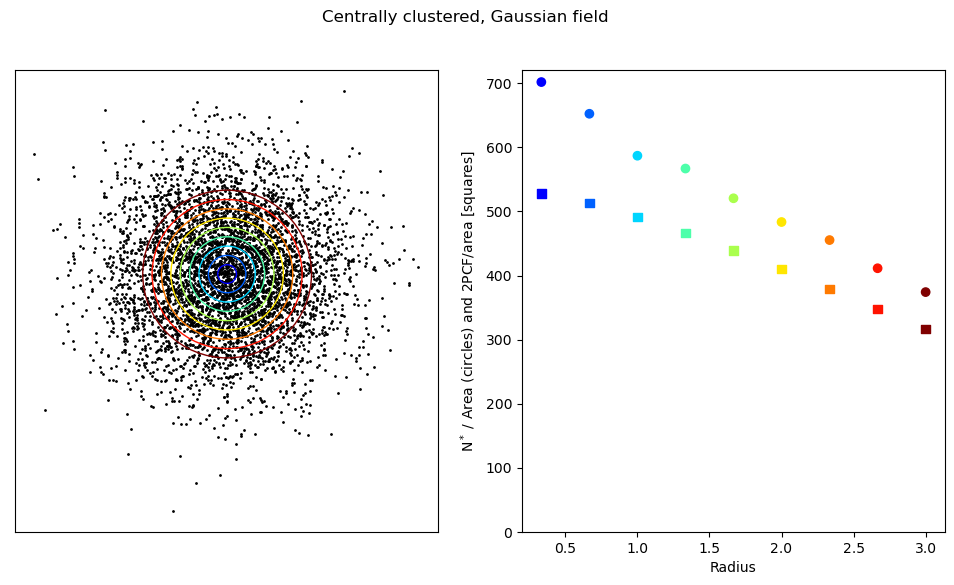

In [6]:
x, y = np.random.randn(5000)*2, np.random.randn(5000)*2
r2 = x**2 + y**2

fig = pl.figure(figsize=(12,6))
ax = pl.subplot(1,2,1)
ax.scatter(x,y, color='k', s=1)
radii = np.linspace(0.0, 3, 10)
for r, col in zip(radii, pl.cm.jet(np.linspace(0,1,10))):
    ax.add_patch(pl.Circle([0., 0.], radius=r, facecolor='none', edgecolor=col))
ax2 = pl.subplot(1,2,2)
nstars = (r2[:,None]<radii[None,:]**2).sum(axis=0) / radii**2
ax2.scatter(radii, nstars, c=pl.cm.jet(np.linspace(0,1,10)))

kt = scipy.spatial.kdtree.KDTree(np.transpose([x,y]))
kt2 = scipy.spatial.kdtree.KDTree(np.transpose([x,y])[r2<1,:])
twopcf = kt.count_neighbors(kt2, radii)
t2 = twopcf/radii**2
t2[0] = np.nan
ax2.scatter(radii, t2/np.nanmax(t2)*np.nanmean(nstars), c=pl.cm.jet(np.linspace(0,1,10)), marker='s')


ax2.set_ylabel("N$^*$ / Area (circles) and 2PCF/area [squares]")

ax.set_xticks([])
ax.set_yticks([])
ax2.set_xlabel("Radius")
pl.suptitle("Centrally clustered, Gaussian field");
pl.ylim(0, pl.ylim()[1]);

# IMF sampling

In [7]:
import imf

In [68]:
masses = np.geomspace(imf.Kroupa.default_mmin, imf.Kroupa.default_mmax, 1000)
kr = imf.kroupa(masses, integral_form=True)

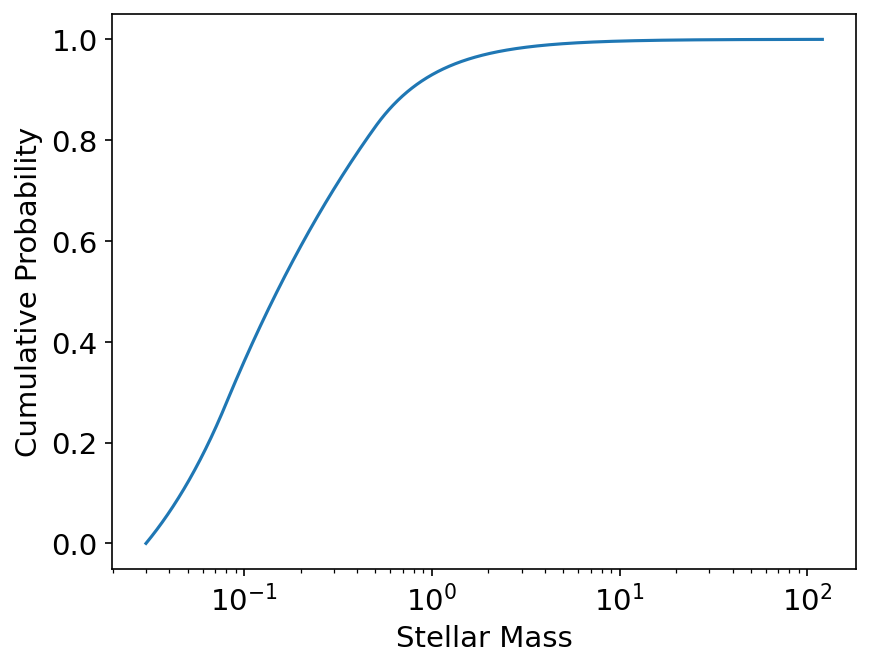

In [69]:
pl.rcParams['font.size'] = 14
pl.semilogx(masses, kr)
pl.xlabel("Stellar Mass")
pl.ylabel("Cumulative Probability");

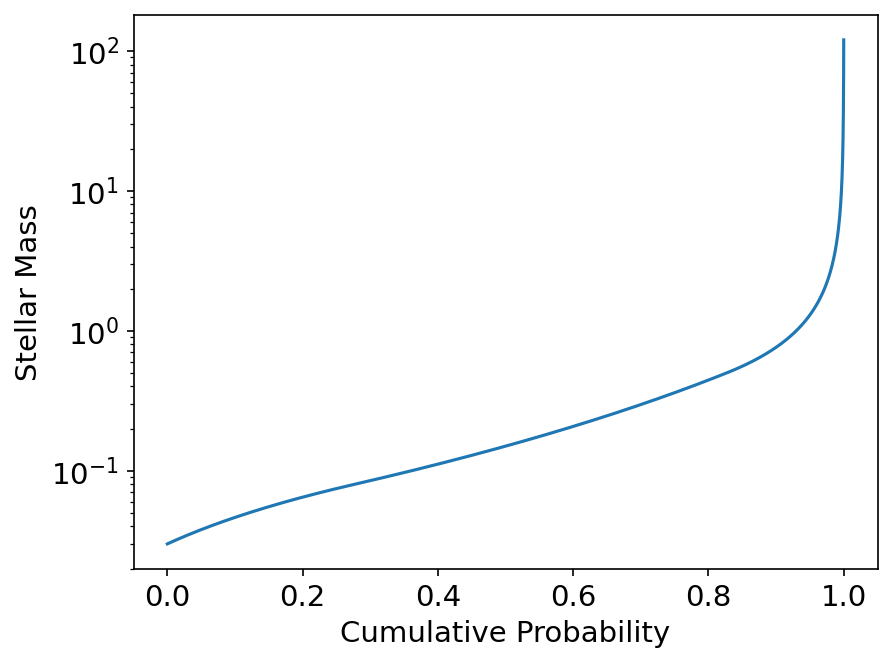

In [70]:
pl.rcParams['font.size'] = 14
pl.rcParams['figure.dpi'] = 150
pl.semilogy(kr, masses)
pl.ylabel("Stellar Mass")
pl.xlabel("Cumulative Probability");

In [71]:
import matplotlib.animation as animation

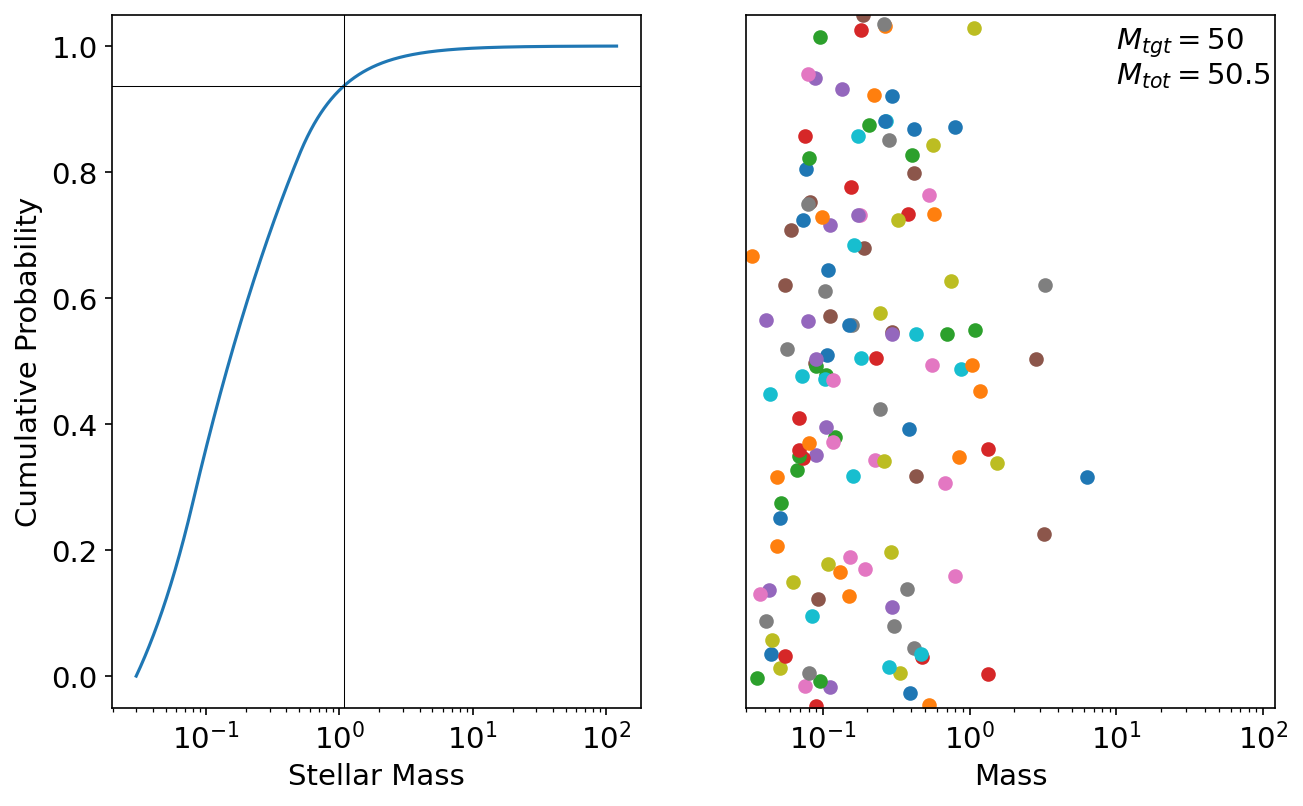

In [84]:
pl.rcParams['font.size'] = 14
pl.rcParams['figure.dpi'] = 150
fig = pl.figure(figsize=(10,6))
ax1 = pl.subplot(1,2,1)
pl.semilogx(masses, kr)
pl.xlabel("Stellar Mass")
pl.ylabel("Cumulative Probability");
ax2 = pl.subplot(1,2,2)
#pl.scatter(10, 0.5, marker='o')
pl.xlim(0.03, 120)
pl.ylim(0,1)
pl.semilogx();
pl.xlabel("Mass")
pl.yticks([])
target_mass = 50
txt2 = ax2.text(10, 0.95, f"$M_{{tgt}}={target_mass}$")

txt = ax2.text(10, 0.9, "$M_{tot}=0$")
masslist = []

def animate(n):
    #if n > 0 and len(ax1.lines) >= 3:
    #    ax1.lines[-2].set_visible(False)
    #    ax1.lines[-1].set_visible(False)


    mtot = np.sum(masslist)

    if mtot < target_mass:

        if len(ax1.lines) > 1:
            for line in ax1.lines[1:]:
                ax1.lines.remove(line)
            
        rr = np.random.rand()
        mass = np.interp(rr, kr, masses)
        
        masslist.append(mass)
        
        mtot = np.sum(masslist)

        ax1.axhline(rr, color='k', linewidth=0.5)
        ax1.axvline(mass, color='k', linewidth=0.5)
        ax2.scatter(mass, np.random.rand())

        txt.set_text(f'$M_{{tot}}={mtot:0.1f}$')

    return fig,     

anim = animation.FuncAnimation(fig, animate, frames=200, repeat_delay=5000,
                              interval=50)
anim.save('cluster_population_animation.gif')

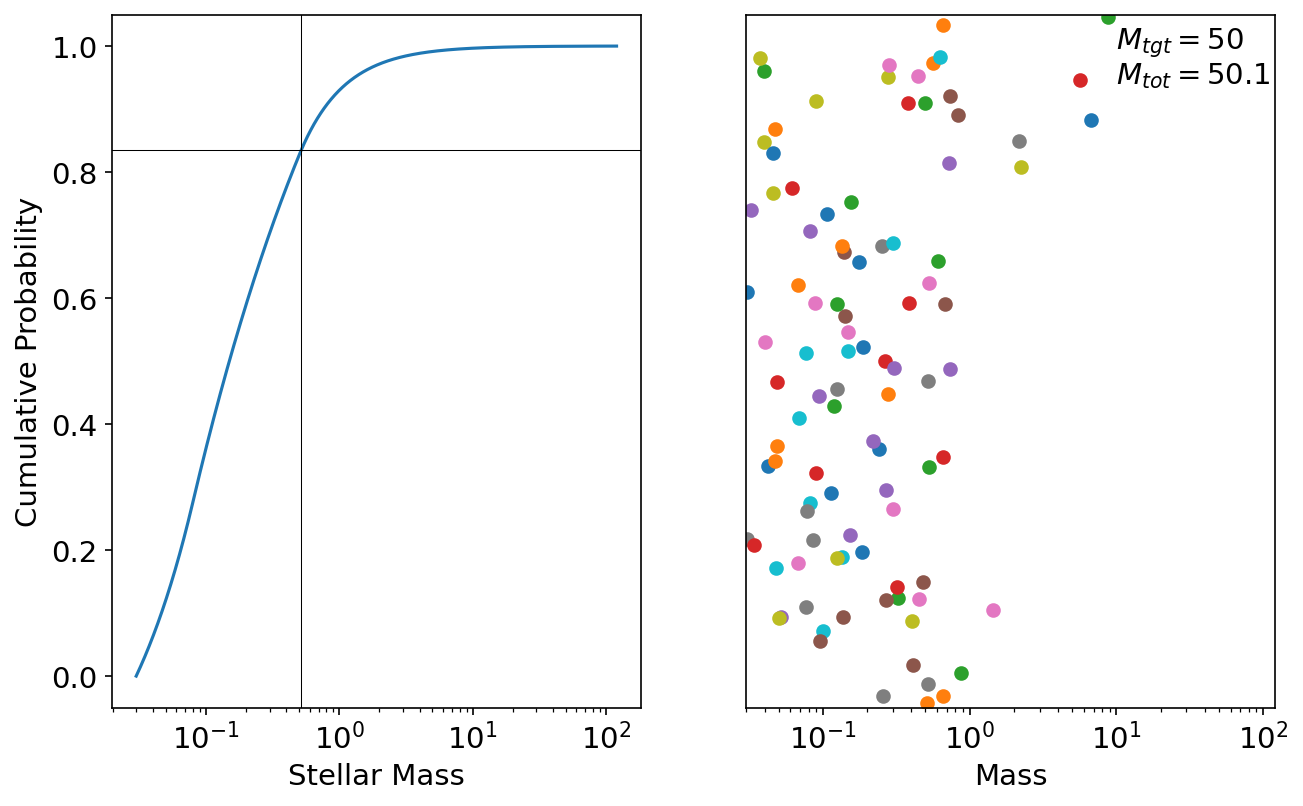

In [85]:
pl.rcParams['font.size'] = 14
pl.rcParams['figure.dpi'] = 150
fig = pl.figure(figsize=(10,6))
ax1 = pl.subplot(1,2,1)
pl.semilogx(masses, kr)
pl.xlabel("Stellar Mass")
pl.ylabel("Cumulative Probability");
ax2 = pl.subplot(1,2,2)
#pl.scatter(10, 0.5, marker='o')
pl.xlim(0.03, 120)
pl.ylim(0,1)
pl.semilogx();
pl.xlabel("Mass")
pl.yticks([])
target_mass = 50
txt2 = ax2.text(10, 0.95, f"$M_{{tgt}}={target_mass}$")

txt = ax2.text(10, 0.9, "$M_{tot}=0$")
masslist = []

def animate(n):



    mtot = np.sum(masslist)

    if mtot < target_mass:

        if len(ax1.lines) > 1:
            for line in ax1.lines[1:]:
                ax1.lines.remove(line)
        
        rr = np.random.rand()
        mass = np.interp(rr, kr, masses)
        
        masslist.append(mass)
        
        mtot = np.sum(masslist)

        ax1.axhline(rr, color='k', linewidth=0.5)
        ax1.axvline(mass, color='k', linewidth=0.5)
        ax2.scatter(mass, np.random.rand())

        txt.set_text(f'$M_{{tot}}={mtot:0.1f}$')

    return fig,     

anim = animation.FuncAnimation(fig, animate, frames=200, repeat_delay=5000,
                              interval=50)
anim.save('cluster_population_animation.mp4')

In [95]:
target_mass = 50
mfc = imf.Kroupa()
expected_mass = mfc.m_integrate(mfc.mmin, mfc.mmax)[0]
nstars = target_mass / expected_mass
nstars, target_mass, expected_mass

(115.22612773408738, 50, 0.4339293611895671)

nstars = 143
0.993006993006993 0 5.815791268226328
0.986013986013986 1 3.4381768453484156
0.9790209790209791 2 2.5233311057590724
0.972027972027972 3 2.024973325187687
0.965034965034965 4 1.7068865343187676
0.958041958041958 5 1.4842846311849032
0.951048951048951 6 1.3187963671627208
0.9440559440559441 7 1.1903842244489538
0.9370629370629371 8 1.0875052203672648
0.9300699300699301 9 1.0030142993469948
0.9230769230769231 10 0.9322384841928906
0.916083916083916 11 0.8719855136900463
0.9090909090909091 12 0.8199961476555566
0.9020979020979021 13 0.7746239175914227
0.8951048951048951 14 0.7346389308865641
0.8881118881118881 15 0.6991028887724227
0.8811188811188811 16 0.6672867822666789
0.8741258741258742 17 0.638615121255225
0.8671328671328671 18 0.6126271909647698
0.8601398601398601 19 0.5889495424042416
0.8531468531468531 20 0.567276077531826
0.8461538461538461 21 0.5473533812519906
0.8391608391608392 22 0.52896974906635
0.8321678321678322 23 0.5119468635306886
0.8251748251748252 24 0.49

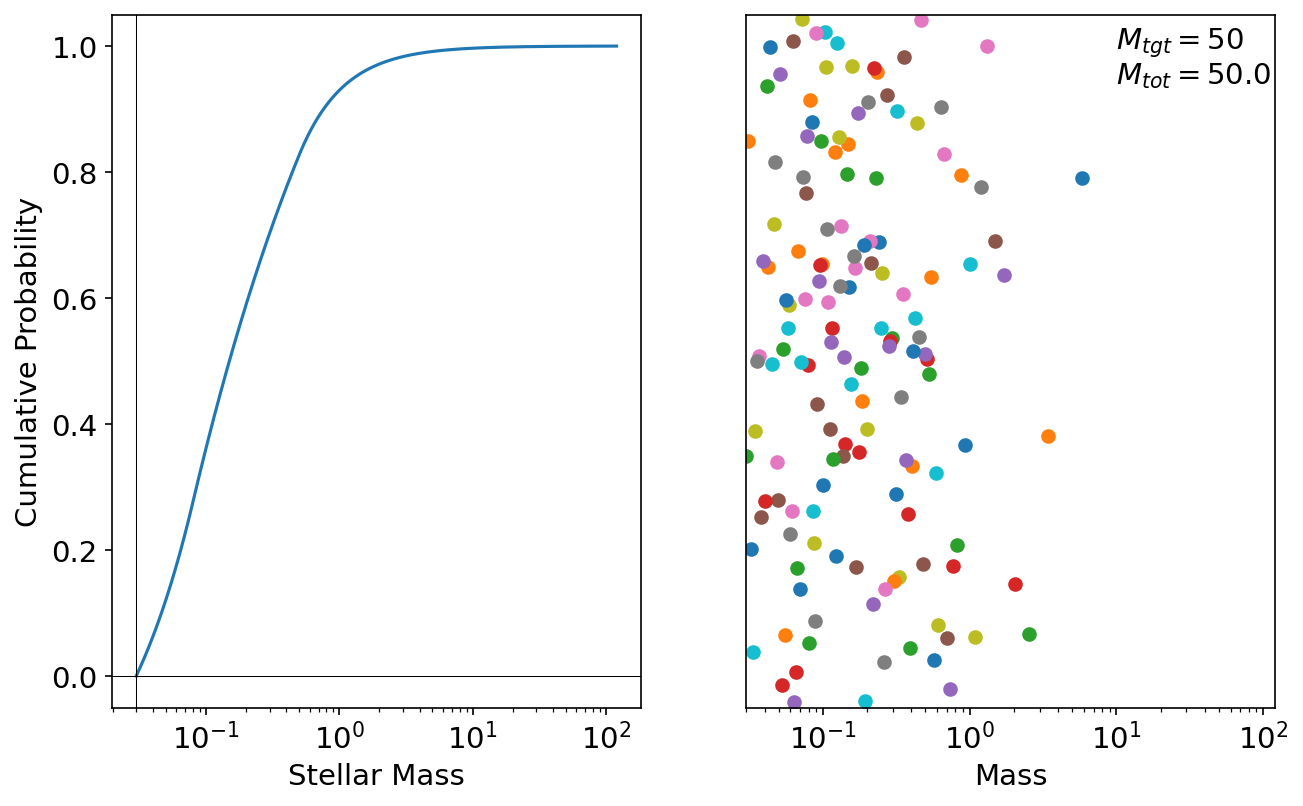

In [138]:
pl.rcParams['font.size'] = 14
pl.rcParams['figure.dpi'] = 150
fig = pl.figure(figsize=(10,6))
ax1 = pl.subplot(1,2,1)
pl.semilogx(masses, kr)
pl.xlabel("Stellar Mass")
pl.ylabel("Cumulative Probability");
ax2 = pl.subplot(1,2,2)
#pl.scatter(10, 0.5, marker='o')
pl.xlim(0.03, 120)
pl.ylim(0,1)
pl.semilogx();
pl.xlabel("Mass")
pl.yticks([])
target_mass = 50
txt2 = ax2.text(10, 0.95, f"$M_{{tgt}}={target_mass}$")

txt = ax2.text(10, 0.9, "$M_{tot}=0$")
masslist = []

mfc = imf.Kroupa()
cl_mass = [mfc.distr.ppf(np.linspace(0, 1-1/int(nstars), int(nstars))).sum()
           for nstars in range(100, 200)]
nstars = (np.arange(100,200)[np.argmin(np.abs(np.array(cl_mass) - 50))])

#expected_mass = mfc.m_integrate(mfc.mmin, mfc.mmax)[0]
#nstars = target_mass / expected_mass
#print(expected_mass, nstars, mfc.mmax)
#expected_mass_ = 0
#
#while np.abs(expected_mass - expected_mass_) / expected_mass > 0.001:
#    mmax = mfc.distr.ppf(1-1/int(nstars))
#    expected_mass_ = expected_mass
#    expected_mass = mfc.m_integrate(mfc.mmin, mmax)[0]
#    nstars = target_mass / expected_mass
#
#    print(expected_mass, nstars, mmax)


#print(nstars)
pp = np.linspace(0, 1-1/int(nstars), int(nstars))[::-1]

ids = list(range(int(nstars)))
print(f"nstars = {nstars}")

def animate(n):

    mtot = np.sum(masslist)

    if mtot < target_mass and n < len(pp) and n in ids:

        if len(ax1.lines) > 1:
            for line in ax1.lines[1:]:
                ax1.lines.remove(line)
        
        ppi = pp[n]
        mass = mfc.distr.ppf(ppi)
        print(ppi, n, mass)
        
        masslist.append(mass)
        
        mtot = np.sum(masslist)

        ax1.axhline(ppi, color='k', linewidth=0.5)
        ax1.axvline(mass, color='k', linewidth=0.5)
        ax2.scatter(mass, np.random.rand())

        txt.set_text(f'$M_{{tot}}={mtot:0.1f}$')
        ids.remove(n)

    return fig,     

anim = animation.FuncAnimation(fig, animate, frames=int(nstars)+10, repeat_delay=5000,
                              interval=50)
anim.save('cluster_population_animation_odf.mp4')

In [110]:
1/(1-imf.kroupa.distr.cdf(4.9327))

114.99772630843077

In [137]:
cl_mass = [mfc.distr.ppf(np.linspace(0, 1-1/int(nstars), int(nstars))).sum()
           for nstars in range(100, 200)]
print(np.arange(100,200)[np.argmin(np.abs(np.array(cl_mass) - 50))])

143


In [133]:
mfc = imf.Kroupa()
expected_mass = mfc.m_integrate(mfc.mmin, mfc.mmax)[0]
nstars = target_mass / expected_mass
print(expected_mass, nstars, mfc.mmax)
expected_mass_ = 0

while np.abs(expected_mass - expected_mass_) / expected_mass > 0.001:
    mmax = mfc.distr.ppf(1-1/int(nstars))
    
    pp = np.linspace(0, 1-1/int(nstars), int(nstars))[::-1]
    mstars = mfc.distr.ppf(pp).sum()

    expected_mass_ = expected_mass
    expected_mass = mfc.m_integrate(mfc.mmin, mfc.mmax)[0]
    nstars = target_mass / expected_mass

    print(expected_mass, nstars, mmax, nstars * expected_mass, mstars.sum())

0.4339293611895671 115.22612773408738 120
0.3175697627413322 157.44572017306993 4.932773837204375 50.0 39.29434671933464
0.330428121491534 151.3188398563137 6.239832418396315 50.0 55.38020092001011
0.3288719742180173 152.03484614001732 6.059391662432491 50.0 53.062047436681794
0.32913663373965474 151.91259457174166 6.089596592281185 50.0 53.44799029694005
